In [1]:
import numpy as np
import time
import tensorflow as tf
def make_binary(dataset):
    data = dataset.flatten()
    data_binary = [1 if i > 0 else 0 for i in data]
    data_binary = np.reshape(data_binary, (dataset.shape[0], dataset.shape[1], dataset.shape[2]))
    print(data_binary.shape)
    return data_binary

In [ ]:
t2 = np.load('MS_bkg_2_mod.npz')
t3 = np.load('MS_bkg_3_mod.npz')
t4 = np.load('MS_bkg_4_mod.npz')


a2 = np.load('MS_sgn_2_mod.npz')
a3 = np.load('MS_sgn_3_mod.npz')
a4 = np.load('MS_sgn_4_mod.npz')
a5 = np.load('MS_sgn_5_mod.npz')
a6 = np.load('MS_sgn_6_mod.npz')
a7 = np.load('MS_sgn_7_mod.npz')
a8 = np.load('MS_sgn_8_mod.npz')
a9 = np.load('MS_sgn_9_mod.npz')
a10 = np.load('MS_sgn_10_mod.npz')

data2=np.asarray(t2['data_noise'])
dataa2=np.asarray(a2['data_noise'])
data3 = np.asarray(t3['data_noise'])
dataa3=np.asarray(a3['data_noise'])
data4 = np.asarray(t4['data_noise'])
dataa4=np.asarray(a4['data_noise'])
dataa5=np.asarray(a5['data_noise'])
dataa6=np.asarray(a6['data_noise'])
dataa7=np.asarray(a7['data_noise'])
dataa8=np.asarray(a8['data_noise'])
dataa9=np.asarray(a9['data_noise'])
dataa10=np.asarray(a10['data_noise'])

datat=np.concatenate((data2[0:30000],data3[0:30000],data4[0:30000]))
dataN=np.concatenate((data2[0:900],data3[0:900],data4[0:900]))
dataA=np.concatenate((dataa2[0:300],dataa3[0:300],dataa4[0:300],dataa5[0:300],dataa6[0:300],dataa7[0:300],dataa8[0:300],dataa9[0:300],dataa10[0:300]))
datat=make_binary(datat)
dataA=make_binary(dataA)
dataN=make_binary(dataN)
datat=np.reshape(datat,(90000,20,333,1))
dataA=np.reshape(dataA,(2700,20,333,1))
dataN=np.reshape(dataN,(2700,20,333,1))
print(datat.shape,dataN.shape,dataA.shape)
np.savez('dataN',data=dataN)
np.savez('datat',data=datat)
np.savez('dataA',data=dataA)

(90000, 20, 333)
(2700, 20, 333)
(2700, 20, 333)
(90000, 20, 333, 1) (2700, 20, 333, 1) (2700, 20, 333, 1)


In [ ]:
# AE simple model

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input = tf.keras.layers.Input(shape=(20, 333, 1),name='input')
x = tf.keras.layers.Conv2D(128, (2,6), activation='relu', strides=(2,2), name='conv2')(input)
x = tf.keras.layers.Conv2D(64, (2,6), activation='relu', strides=(2,2), name='conv3')(x)
x = tf.keras.layers.Conv2D(48, (2,6), activation='relu', strides=(1,2), name='conv4')(x)
x = tf.keras.layers.Conv2D(32, (2,6), activation='relu', strides=(1,2),name='conv5')(x)
x = tf.keras.layers.Conv2D(16, (2,6), activation='relu', strides=(1,2),name='conv6')(x)
x = tf.keras.layers.Flatten(name='flatten1')(x)
x = tf.keras.layers.Dense(5,name="dense0")(x)
x = tf.keras.layers.Dense(2*6*16,name="dense1",activation='relu')(x)
x = tf.keras.layers.Reshape((2,6,16),name='reshape')(x)
x = tf.keras.layers.Conv2DTranspose(32, (2,6), activation='relu', strides=(1,2),name='conv_transpose2')(x)
x = tf.keras.layers.Conv2DTranspose(48, (2,6), activation='relu', strides=(1,2), name='conv_transpose3')(x)
x = tf.keras.layers.Conv2DTranspose(64, (2,7), activation='relu', strides=(1,2), name='conv_transpose4')(x)
x = tf.keras.layers.Conv2DTranspose(128, (2,10), activation='relu', strides=(2,2), name='conv_transpose5')(x)
output = tf.keras.layers.Conv2DTranspose(1, (2,11), activation='relu', strides=(2,2), name='conv_transpose6')(x)

bce=tf.keras.losses.BinaryCrossentropy()
autoencoder_preTrain = Model(input, output, name="AE")
optimizer = Adam()
autoencoder_preTrain.compile(optimizer=optimizer, loss=bce)
autoencoder_preTrain.summary()

Model: "AE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 20, 333, 1)]      0         
_________________________________________________________________
conv2 (Conv2D)               (None, 10, 164, 128)      1664      
_________________________________________________________________
conv3 (Conv2D)               (None, 5, 80, 64)         98368     
_________________________________________________________________
conv4 (Conv2D)               (None, 4, 38, 48)         36912     
_________________________________________________________________
conv5 (Conv2D)               (None, 3, 17, 32)         18464     
_________________________________________________________________
conv6 (Conv2D)               (None, 2, 6, 16)          6160      
_________________________________________________________________
flatten1 (Flatten)           (None, 192)               0        

2023-04-28 09:52:03.490746: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2023-04-28 09:52:03.520393: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:3b:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2023-04-28 09:52:03.520493: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-28 09:52:03.520576: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcublas.so.10'; dlerror: libcublas.so.10: cannot open shared object file: No such file 

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='AEpreTrain.h5',
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             save_weights_only=False,                   
                             mode='min')
callbacks = [checkpoint]
history=autoencoder_preTrain.fit(x=datat,y=datat,epochs=30,batch_size=128,validation_split=.2, verbose=1,callbacks=callbacks,shuffle=True)


2023-04-28 09:52:03.735076: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 3836160000 exceeds 10% of free system memory.
2023-04-28 09:52:06.291687: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 3836160000 exceeds 10% of free system memory.


Epoch 1/30
563/563 [==============================] - ETA: 0s - loss: 0.1233
Epoch 00001: val_loss improved from inf to 0.15992, saving model to AEpreTrain.h5
563/563 [==============================] - 285s 507ms/step - loss: 0.1233 - val_loss: 0.1599
Epoch 2/30
563/563 [==============================] - ETA: 0s - loss: 0.1189
Epoch 00002: val_loss improved from 0.15992 to 0.15923, saving model to AEpreTrain.h5
563/563 [==============================] - 278s 494ms/step - loss: 0.1189 - val_loss: 0.1592
Epoch 3/30
563/563 [==============================] - ETA: 0s - loss: 0.1192
Epoch 00003: val_loss did not improve from 0.15923
563/563 [==============================] - 270s 479ms/step - loss: 0.1192 - val_loss: 0.1593
Epoch 4/30
563/563 [==============================] - ETA: 0s - loss: 0.1180
Epoch 00004: val_loss improved from 0.15923 to 0.15888, saving model to AEpreTrain.h5
563/563 [==============================] - 260s 462ms/step - loss: 0.1180 - val_loss: 0.1589
Epoch 5/30
563/

In [ ]:
selected_pm_layers = ['flatten1','dense0','dense1']
selected_pm_layer_weights = [1.0,1.0, 1.0]

In [ ]:
autoencoder_preTrain=tf.keras.models.load_model('AEpreTrain.h5')

In [ ]:
autoencoder.set_weights(autoencoder_preTrain.get_weights())

In [ ]:
outputs = [autoencoder_preTrain.get_layer(l).output for l in selected_pm_layers]
outputs

[<tf.Tensor 'flatten1/Reshape_3:0' shape=(None, 192) dtype=float32>,
 <tf.Tensor 'dense0/BiasAdd_3:0' shape=(None, 5) dtype=float32>,
 <tf.Tensor 'dense1/Relu_3:0' shape=(None, 192) dtype=float32>]

In [ ]:

model_pre = Model(autoencoder_preTrain.input, outputs)


def perceptual_loss(x, decoted):
    '''Perceptual loss for the DFC VAE'''


    #this takes the hidden rep of the input image and the decodated one
    h1_list = model_pre(x)
    h2_list = model_pre(decoted)
    rc_loss = 0.

    for h1, h2, weight in zip(h1_list, h2_list, selected_pm_layer_weights):
        h1 = tf.keras.backend.batch_flatten(h1)
        h2 = tf.keras.backend.batch_flatten(h2)
        rc_loss = rc_loss + weight * tf.keras.backend.sum(tf.keras.backend.square(h1 - h2), axis=-1)
    
    return rc_loss

In [ ]:
input = tf.keras.layers.Input(shape=(20, 333, 1),name='input')
x = tf.keras.layers.Conv2D(128, (2,6), activation='relu', strides=(2,2), name='conv2')(input)
x = tf.keras.layers.Conv2D(64, (2,6), activation='relu', strides=(2,2), name='conv3')(x)
x = tf.keras.layers.Conv2D(48, (2,6), activation='relu', strides=(1,2), name='conv4')(x)
x = tf.keras.layers.Conv2D(32, (2,6), activation='relu', strides=(1,2),name='conv5')(x)
x = tf.keras.layers.Conv2D(16, (2,6), activation='relu', strides=(1,2),name='conv6')(x)
x = tf.keras.layers.Flatten(name='flatten1')(x)
x = tf.keras.layers.Dense(5,name="dense0")(x)
x = tf.keras.layers.Dense(2*6*16,name="dense1",activation='relu')(x)
x = tf.keras.layers.Reshape((2,6,16),name='reshape')(x)
x = tf.keras.layers.Conv2DTranspose(32, (2,6), activation='relu', strides=(1,2),name='conv_transpose2')(x)
x = tf.keras.layers.Conv2DTranspose(48, (2,6), activation='relu', strides=(1,2), name='conv_transpose3')(x)
x = tf.keras.layers.Conv2DTranspose(64, (2,7), activation='relu', strides=(1,2), name='conv_transpose4')(x)
x = tf.keras.layers.Conv2DTranspose(128, (2,10), activation='relu', strides=(2,2), name='conv_transpose5')(x)
output = tf.keras.layers.Conv2DTranspose(1, (2,11), activation='relu', strides=(2,2), name='conv_transpose6')(x)

optimizer = Adam()
autoencoder=Model(input,output,name="AEperceptual")
autoencoder.compile(optimizer=optimizer, loss=perceptual_loss)
autoencoder.summary()

Model: "AEperceptual"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 20, 333, 1)]      0         
_________________________________________________________________
conv2 (Conv2D)               (None, 10, 164, 128)      1664      
_________________________________________________________________
conv3 (Conv2D)               (None, 5, 80, 64)         98368     
_________________________________________________________________
conv4 (Conv2D)               (None, 4, 38, 48)         36912     
_________________________________________________________________
conv5 (Conv2D)               (None, 3, 17, 32)         18464     
_________________________________________________________________
conv6 (Conv2D)               (None, 2, 6, 16)          6160      
_________________________________________________________________
flatten1 (Flatten)           (None, 192)              

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='AEperceptual.h5', 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             save_weights_only=False,
                             mode='min')
callbacks = [checkpoint]
history=autoencoder.fit(x=datat,y=datat,epochs=80,batch_size=64,validation_split=0.2, verbose=1,callbacks=callbacks,shuffle=True)

2023-04-28 12:09:15.373538: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 3836160000 exceeds 10% of free system memory.
2023-04-28 12:09:18.030542: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 3836160000 exceeds 10% of free system memory.


Epoch 1/80
1125/1125 [==============================] - ETA: 0s - loss: 22.1494
Epoch 00001: val_loss improved from inf to 11.72815, saving model to AEperceptual.h5
1125/1125 [==============================] - 363s 323ms/step - loss: 22.1494 - val_loss: 11.7281
Epoch 2/80
1125/1125 [==============================] - ETA: 0s - loss: 4.9302
Epoch 00002: val_loss improved from 11.72815 to 7.24018, saving model to AEperceptual.h5
1125/1125 [==============================] - 366s 326ms/step - loss: 4.9302 - val_loss: 7.2402
Epoch 3/80
1125/1125 [==============================] - ETA: 0s - loss: 3.6450
Epoch 00003: val_loss improved from 7.24018 to 5.93735, saving model to AEperceptual.h5
1125/1125 [==============================] - 367s 326ms/step - loss: 3.6450 - val_loss: 5.9374
Epoch 4/80
1125/1125 [==============================] - ETA: 0s - loss: 3.1082
Epoch 00004: val_loss improved from 5.93735 to 5.28876, saving model to AEperceptual.h5
1125/1125 [==============================] - 3

Epoch 35/80
1125/1125 [==============================] - ETA: 0s - loss: 1.4860
Epoch 00035: val_loss did not improve from 3.80651
1125/1125 [==============================] - 373s 332ms/step - loss: 1.4860 - val_loss: 3.8399
Epoch 36/80
1125/1125 [==============================] - ETA: 0s - loss: 1.4568
Epoch 00036: val_loss did not improve from 3.80651
1125/1125 [==============================] - 371s 330ms/step - loss: 1.4568 - val_loss: 4.0500
Epoch 37/80
1125/1125 [==============================] - ETA: 0s - loss: 1.4451
Epoch 00037: val_loss did not improve from 3.80651
1125/1125 [==============================] - 373s 332ms/step - loss: 1.4451 - val_loss: 3.9718
Epoch 38/80
1125/1125 [==============================] - ETA: 0s - loss: 1.4549
Epoch 00038: val_loss did not improve from 3.80651
1125/1125 [==============================] - 370s 329ms/step - loss: 1.4549 - val_loss: 3.8754
Epoch 39/80
1125/1125 [==============================] - ETA: 0s - loss: 1.4355
Epoch 00039: val

Epoch 71/80
1125/1125 [==============================] - ETA: 0s - loss: 1.2801
Epoch 00071: val_loss did not improve from 3.76494
1125/1125 [==============================] - 355s 316ms/step - loss: 1.2801 - val_loss: 3.8685
Epoch 72/80
1125/1125 [==============================] - ETA: 0s - loss: 1.2767
Epoch 00072: val_loss did not improve from 3.76494
1125/1125 [==============================] - 363s 323ms/step - loss: 1.2767 - val_loss: 3.8308
Epoch 73/80
1125/1125 [==============================] - ETA: 0s - loss: 1.2620
Epoch 00073: val_loss did not improve from 3.76494
1125/1125 [==============================] - 361s 321ms/step - loss: 1.2620 - val_loss: 3.8943
Epoch 74/80
1125/1125 [==============================] - ETA: 0s - loss: 1.2668
Epoch 00074: val_loss did not improve from 3.76494
1125/1125 [==============================] - 358s 318ms/step - loss: 1.2668 - val_loss: 3.8623
Epoch 75/80
1125/1125 [==============================] - ETA: 0s - loss: 1.2742
Epoch 00075: val

In [ ]:
autoencoder=tf.keras.models.load_model('AEperceptual.h5',compile=False)
autoencoder.summary()

Model: "AEperceptual"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 20, 333, 1)]      0         
_________________________________________________________________
conv2 (Conv2D)               (None, 10, 164, 128)      1664      
_________________________________________________________________
conv3 (Conv2D)               (None, 5, 80, 64)         98368     
_________________________________________________________________
conv4 (Conv2D)               (None, 4, 38, 48)         36912     
_________________________________________________________________
conv5 (Conv2D)               (None, 3, 17, 32)         18464     
_________________________________________________________________
conv6 (Conv2D)               (None, 2, 6, 16)          6160      
_________________________________________________________________
flatten1 (Flatten)           (None, 192)              

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input = tf.keras.layers.Input(shape=(20, 333, 1),name='input1')
x = tf.keras.layers.Conv2D(128, (2,6), activation='relu', strides=(2,2), name='conv2')(input)
x = tf.keras.layers.Conv2D(64, (2,6), activation='relu', strides=(2,2), name='conv3')(x)
x = tf.keras.layers.Conv2D(48, (2,6), activation='relu', strides=(1,2), name='conv4')(x)
x = tf.keras.layers.Conv2D(32, (2,6), activation='relu', strides=(1,2),name='conv5')(x)
x = tf.keras.layers.Conv2D(16, (2,6), activation='relu', strides=(1,2),name='conv6')(x)
x = tf.keras.layers.Flatten(name='flatten1')(x)
output = tf.keras.layers.Dense(5,name="dense0")(x)


bce=tf.keras.losses.BinaryCrossentropy()
encoder = Model(input, output, name="encoder")
optimizer = Adam()
encoder.compile(optimizer=optimizer, loss=bce)
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input1 (InputLayer)          [(None, 20, 333, 1)]      0         
_________________________________________________________________
conv2 (Conv2D)               (None, 10, 164, 128)      1664      
_________________________________________________________________
conv3 (Conv2D)               (None, 5, 80, 64)         98368     
_________________________________________________________________
conv4 (Conv2D)               (None, 4, 38, 48)         36912     
_________________________________________________________________
conv5 (Conv2D)               (None, 3, 17, 32)         18464     
_________________________________________________________________
conv6 (Conv2D)               (None, 2, 6, 16)          6160      
_________________________________________________________________
flatten1 (Flatten)           (None, 192)               0   

In [ ]:

encoder.layers[0].set_weights(autoencoder.layers[0].get_weights())
encoder.layers[1].set_weights(autoencoder.layers[1].get_weights())
encoder.layers[2].set_weights(autoencoder.layers[2].get_weights())
encoder.layers[3].set_weights(autoencoder.layers[3].get_weights())
encoder.layers[4].set_weights(autoencoder.layers[4].get_weights())
encoder.layers[5].set_weights(autoencoder.layers[5].get_weights())
encoder.layers[6].set_weights(autoencoder.layers[6].get_weights())
encoder.layers[7].set_weights(autoencoder.layers[7].get_weights())

encoder.save('encoder_perceptual.h5')

In [ ]:
import math

filN=np.load('dataN.npz')
filA=np.load('MS_sgn_2_mod.npz')

dataA=filA['data_noise']
dataN=filN['data']


dataA=dataA[0:2700]
dataN=dataN[0:2700]

dataA=make_binary(dataA)
dataN=make_binary(dataN)

dataA=np.reshape(dataA,(2700,20,333,1))
dataN=np.reshape(dataN,(2700,20,333,1))


rN=encoder.predict(dataN,verbose=2)
rA=encoder.predict(dataA,verbose=2)


RN=[]
RA=[]

for i in range(len(rN)):
    RN.append(np.sum(rN[i]))
    RA.append(np.sum(rA[i]))
    
RN=np.asarray(RN)
RA=np.asarray(RA)
print(RA.shape,RN.shape)

(2700, 20, 333)
(2700, 20, 333)
85/85 - 1s
85/85 - 1s
(2700,) (2700,)


<Figure size 432x288 with 0 Axes>

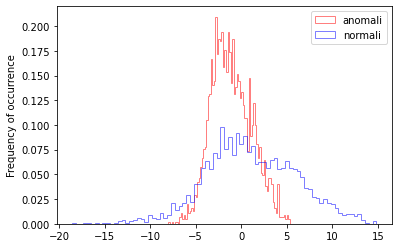

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure()
fig,ax=plt.subplots()
plt.hist(RA,bins=80, alpha=0.5, color='red',density=True, label='anomali',histtype='step')
plt.hist(RN,bins=80, alpha=0.5,color='blue', density=True, label='normali',histtype='step')
#ax.set_xlabel('Binary crossentropy')
ax.set_ylabel('Frequency of occurrence')
plt.legend()
plt.show()